In [108]:
from sympy import *
from sympy.plotting import plot_parametric

In [4]:
A = Matrix([[5, -3],
            [6, -4]])
A

Matrix([
[5, -3],
[6, -4]])

In [5]:
B = Matrix([[0],
            [1]])
B

Matrix([
[0],
[1]])

In [6]:
x0 = Matrix([[0],
             [2]])
x0

Matrix([
[0],
[2]])

In [7]:
p = Matrix([[-3],
            [-1]])
p

Matrix([
[-3],
[-1]])

In [8]:
P = Matrix([[17, 12],
            [12, 10]])
P

Matrix([
[17, 12],
[12, 10]])

In [11]:
eigs = A.eigenvects()
pprint(eigs)

⎡⎛       ⎡⎡1/2⎤⎤⎞  ⎛      ⎡⎡1⎤⎤⎞⎤
⎢⎜-1, 1, ⎢⎢   ⎥⎥⎟, ⎜2, 1, ⎢⎢ ⎥⎥⎟⎥
⎣⎝       ⎣⎣ 1 ⎦⎦⎠  ⎝      ⎣⎣1⎦⎦⎠⎦


In [25]:
t, tau = symbols('t tau', real=True)
t0 = 0
t1 = log(2)

In [26]:
Phi = (eigs[0][2][0] * exp(eigs[0][0] * t)).col_insert(1, eigs[1][2][0] * exp(eigs[1][0] * t))
Phi

Matrix([
[exp(-t)/2, exp(2*t)],
[  exp(-t), exp(2*t)]])

In [27]:
expA = Phi @ Phi.subs({t: 0}).inv()
expA

Matrix([
[  2*exp(2*t) - exp(-t),   -exp(2*t) + exp(-t)],
[2*exp(2*t) - 2*exp(-t), -exp(2*t) + 2*exp(-t)]])

In [24]:
l1, l2 = symbols('l1 l2', real=True)
l = Matrix([[l1],
             [l2]])
l

Matrix([
[l1],
[l2]])

In [28]:
H = expA.subs({t: t1 - tau}) @ B
H

Matrix([
[exp(tau)/2 - 4*exp(-2*tau)],
[  exp(tau) - 4*exp(-2*tau)]])

In [73]:
norm_Hl = sqrt(integrate((H.T @ l) ** 2, (tau, t0, t1))[0])
norm_Hl

sqrt(17*l1**2/8 + 3*l1*l2 + 5*l2**2/4)

In [75]:
simplify(norm_Hl * sqrt(8))

sqrt(17*l1**2 + 24*l1*l2 + 10*l2**2)

In [53]:
simplify(l.dot(P @ l))

17*l1**2 + 24*l1*l2 + 10*l2**2

In [76]:
bnd = simplify(l.dot(p - expA.subs({t: t1 - t0}) @ x0) - sqrt(8))
bnd

4*l1 + 5*l2 - 2*sqrt(2)

In [77]:
constr = norm_Hl ** 2 - 1
constr

17*l1**2/8 + 3*l1*l2 + 5*l2**2/4 - 1

In [78]:
lam = symbols('lambda', real=True)
lam

lambda

In [79]:
L = bnd + lam * constr
L

4*l1 + 5*l2 + lambda*(17*l1**2/8 + 3*l1*l2 + 5*l2**2/4 - 1) - 2*sqrt(2)

In [82]:
sol = solve([L.diff(l1), L.diff(l2), L.diff(lam)], (l1, l2, lam))
sol

[(-8*sqrt(1365)/273, 74*sqrt(1365)/1365, -sqrt(1365)/13),
 (8*sqrt(1365)/273, -74*sqrt(1365)/1365, sqrt(1365)/13)]

In [85]:
l1_opt0, l2_opt0, lam_opt0 = sol[0]
l1_opt1, l2_opt1, lam_opt1 = sol[1]

In [87]:
bnd.subs({l1: l1_opt0, l2: l2_opt0})

-2*sqrt(2) + 2*sqrt(1365)/13

In [88]:
bnd.subs({l1: l1_opt1, l2: l2_opt1})

-2*sqrt(1365)/13 - 2*sqrt(2)

In [89]:
l1_max, l2_max = l1_opt0, l2_opt0

In [90]:
mu = bnd.subs({l1: l1_opt0, l2: l2_opt0})
mu

-2*sqrt(2) + 2*sqrt(1365)/13

In [93]:
mu.evalf()

2.85555847584186

In [99]:
u_opt = simplify(mu * H.T @ l.subs({l1: l1_max, l2: l2_max}) / norm_Hl.subs({l1: l1_max, l2: l2_max}))
u_opt

Matrix([[4*sqrt(1365)*(-13*sqrt(2) + sqrt(1365))*(27*exp(3*tau) - 68)*exp(-2*tau)/17745]])

In [104]:
sqrt(integrate(u_opt ** 2, (tau, t0, t1))[0]).evalf()

2.85555847584186

In [106]:
x_opt = simplify(expA.subs({t: t - t0}) @ x0 + integrate(expA.subs({t: t - tau}) @ B @ u_opt, (tau, t0, t)))
x_opt

Matrix([
[  2*(-3465*exp(4*t) + 20*sqrt(2730)*exp(4*t) - 81*sqrt(2730)*exp(3*t) + 8505*exp(3*t) - 15750*exp(t) + 163*sqrt(2730)*exp(t) - 102*sqrt(2730) + 10710)*exp(-2*t)/1365],
[2*(-3465*exp(4*t) + 20*sqrt(2730)*exp(4*t) - 108*sqrt(2730)*exp(3*t) + 11340*exp(3*t) - 31500*exp(t) + 326*sqrt(2730)*exp(t) - 238*sqrt(2730) + 24990)*exp(-2*t)/1365]])

In [115]:
z1, z2 = symbols('z1 z2', real=True)
z = Matrix([[z1],
            [z2]])

In [119]:
X1 = (z - p).dot(P.inv() @ (z - p)) - 1
simplify(X1)

5*z1**2/13 - 12*z1*z2/13 + 18*z1/13 + 17*z2**2/26 - 19*z2/13 + 9/26

In [135]:
pprint(P.inv().eigenvects())

⎡⎛         ⎡⎡4/3⎤⎤⎞  ⎛      ⎡⎡-3/4⎤⎤⎞⎤
⎢⎜1/26, 1, ⎢⎢   ⎥⎥⎟, ⎜1, 1, ⎢⎢    ⎥⎥⎟⎥
⎣⎝         ⎣⎣ 1 ⎦⎦⎠  ⎝      ⎣⎣ 1  ⎦⎦⎠⎦


In [141]:
no_control = expA.subs({t: t - t0}) @ x0
no_control

Matrix([
[-2*exp(2*t) + 2*exp(-t)],
[-2*exp(2*t) + 4*exp(-t)]])

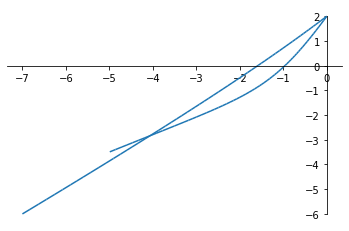

In [145]:
p1 = plot_parametric((x_opt[0], x_opt[1], (t, t0, t1)), (no_control[0], no_control[1], (t, t0, t1)))

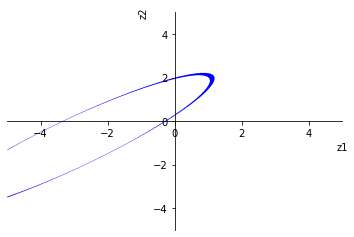

In [120]:
plot_implicit(X1)

In [122]:
x1 = x_opt.subs(t, t1).evalf()
X1.subs({z1: x1[0], z2: x1[1]})

2.22044604925031e-16